In [2]:
include("NTKernel.jl");

In [20]:
# PSUDEO data
g = x -> cos(2x)+sin(x/2)           # anonymous function g(x)

X = range(1, stop=4, length=20)
X = Matrix(reshape(X, 1, :))        # reshape, each column vector is read as data point

Y = map(g,X);                       # Map with g(x)

In [5]:
# nodes on hidden layer
Nh = 100
InputDim = 1
activation = sigmoid

model = Chain(Dense(InputDim=>Nh,activation),Dense(Nh=>InputDim))|>f64

K = kernel(model, X)
normalized_K = K / sqrt(Nh) # Normalize the kernel matrix

λ_values = eigen(normalized_K).values;

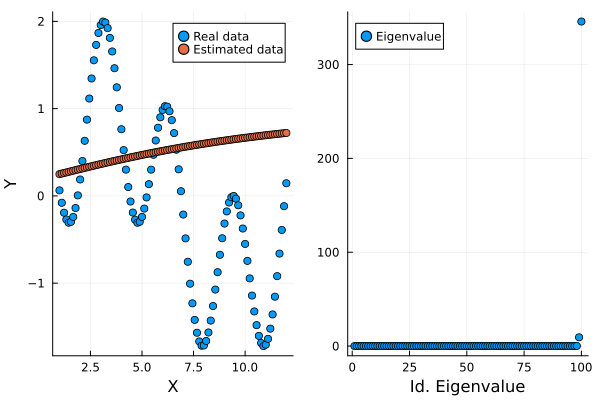

In [11]:
using Plots

Ý = map_model(model,X)

# Create subplots
plot1 = scatter(X[:], Y[:], label="Real data", xlabel="X", ylabel="Y")
scatter!(X[:], Ý[:], label="Estimated data")

plot2 = scatter(λ_values, label="Eigenvalue", xlabel = "Id. Eigenvalue")

# Combine subplots into a single plot
plot(plot1, plot2)

<h1> Now, lets start tinkering with the models </h1>

In [37]:
# nodes on hidden layer

function create_model(Ni, Nh, No, N, activation)
    layers = [] # Initialize an empty array without specifying the type of elements
    push!(layers, Dense(Ni, N, activation)) # First hidden layer with N nodes and specified activation
    for _ in 2:Nh
        push!(layers, Dense(N, N, activation)) # Additional Nh-1 hidden layers
    end
    push!(layers, Dense(N, No)) # Output layer without specifying an activation function (defaults to identity)
    model = Chain(layers...)|>f64 # Create the model from the layers
    return model
end


Nh_list = [100, 200] 
H_Layers = [1, 10]
models = []
activation = sigmoid

InputDim = 1

models = []
for Nh in 1:length(Nh_list)
    for Layer in 1:length(H_Layers)
        push!(models, create_model(InputDim,H_Layers[Layer],InputDim,Nh_list[Nh],activation))
    end
end


Kernels = []
for model in models
    push!(Kernels, kernel(model, X))
end

Kernels_Norms = []
# Iterate over each kernel and normalize according to your pattern
for i in 1:length(Kernels)
    # Use mod1 to cycle through Nh_list based on i
    # This approach correctly associates each kernel with its Nh value according to your pattern
    Nh_index = mod1(i, length(Nh_list))
    Nh = Nh_list[Nh_index]
    normalized_K = Kernels[i] / sqrt(Nh)
    push!(Kernels_Norms, normalized_K)
end
λ_values = []
for K in Kernels_Norms
    push!(λ_values, eigen(K).values) # Compute eigenvalues for each kernel and store
end


# loss(a, b) = Flux.Losses.mse(models[1](a), b)
#Flux.train!(loss, Flux.params(models[1]), [(X,Y)], Descent(0.01))
# for i in 1:length(λ_values)
#     display(λ_values[i])
# end

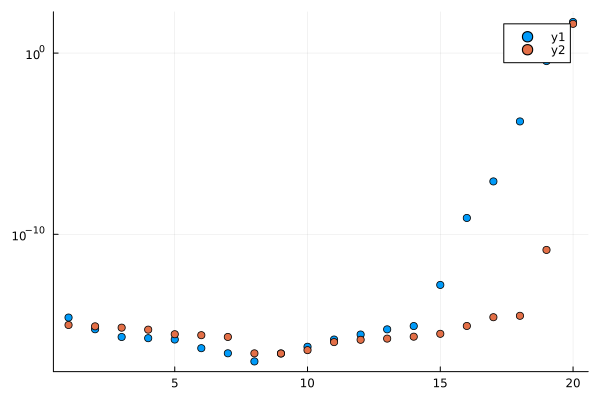

In [38]:
scatter(abs.(λ_values[1]), yaxis=:log10)
scatter!(abs.(λ_values[2]))
